# 1. Importing packages

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '../content/drive/MyDrive/ofa-ai-mastery-computer-vision'

# 2. Visualising data

In [ ]:
names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names
data['Number of samples']+=nums

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,dog,900
1,horse,600
2,deer,600
3,cat,700


<Axes: xlabel='Name of class', ylabel='Number of samples'>

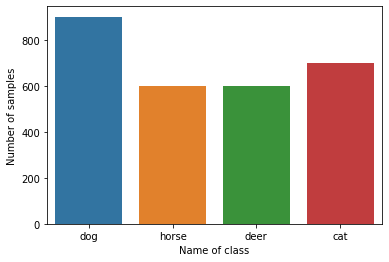

In [ ]:
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

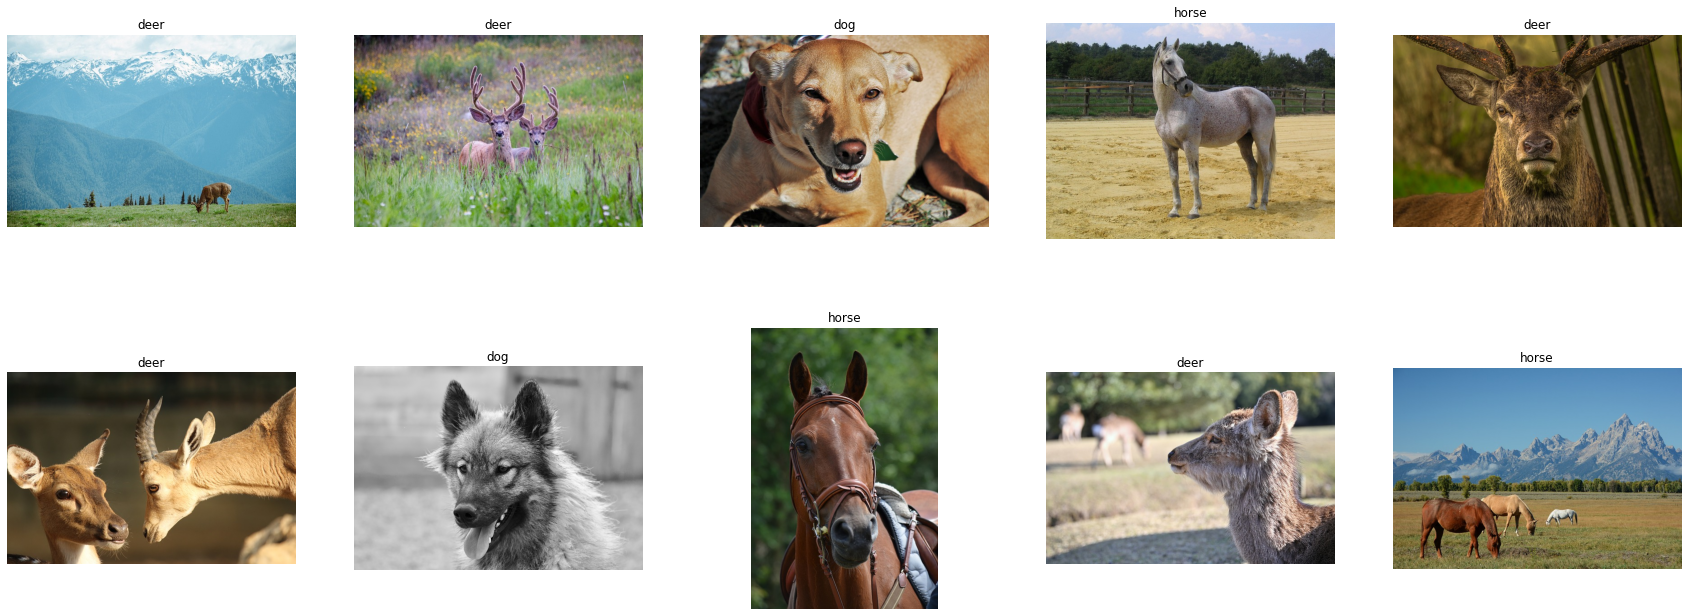

In [ ]:
classes = os.listdir(path+'/train')

plt.figure(figsize=(30 , 30))
for x in range(10):
    i = random.randint(0,3)                    # getting the class
    images = os.listdir(path+'/train'+'/'+classes[i])
    j = random.randint(0,600)                  # getting the image
    image = cv2.imread(path+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

# 3. Preparing the data

In [ ]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, vertical_flip=True, validation_split=0.2)

In [ ]:
train_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='training',
        target_size=(224 , 224),
        batch_size=32)

val_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='validation',
        target_size=(224 , 224),
        batch_size=32 )

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


# 4. Building the model

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet201
base_model = DenseNet201(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
# i'll be using inception_v3 for this model , along with 2 extra dense layers and the output layer

#mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           #include_top=False,
                                           #weights='imagenet')

#model = Sequential()
#model.add(mobilenet)
#model.add(GlobalAveragePooling2D())
#model.add(Flatten())
#model.add(Dense(1024, activation="relu"))
#model.add(Dense(512, activation="relu"))
#model.add(Dense(256, activation="relu"))
#model.add(Dense(128, activation="relu"))
#model.add(Dense(64, activation="relu"))
#model.add(Dense(32, activation="relu"))
#model.add(Dropout(0.5))
#model.add(Dense(4, activation="softmax" , name="classification"))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005,momentum=0.9),
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 1024)              1967104   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                        

# 5. Training and evaluating

In [ ]:
history = model.fit(train_ds , validation_data = val_ds , epochs = 10)

Epoch 1/10
70/70 [==============================] - 487s 6s/step - loss: 1.2284 - accuracy: 0.4888 - val_loss: 0.9511 - val_accuracy: 0.7321
Epoch 2/10
70/70 [==============================] - 65s 923ms/step - loss: 0.6729 - accuracy: 0.8161 - val_loss: 0.4702 - val_accuracy: 0.8482
Epoch 3/10
70/70 [==============================] - 64s 909ms/step - loss: 0.3346 - accuracy: 0.9098 - val_loss: 0.2473 - val_accuracy: 0.9179
Epoch 4/10
70/70 [==============================] - 64s 914ms/step - loss: 0.2267 - accuracy: 0.9214 - val_loss: 0.2352 - val_accuracy: 0.9161
Epoch 5/10
70/70 [==============================] - 66s 942ms/step - loss: 0.1679 - accuracy: 0.9411 - val_loss: 0.1936 - val_accuracy: 0.9375
Epoch 6/10
70/70 [==============================] - 65s 923ms/step - loss: 0.1368 - accuracy: 0.9518 - val_loss: 0.2215 - val_accuracy: 0.9286
Epoch 7/10
70/70 [==============================] - 64s 913ms/step - loss: 0.1029 - accuracy: 0.9652 - val_loss: 0.1275 - val_accuracy: 0.9536
E

18/18 [==============================] - 11s 610ms/step - loss: 0.1412 - accuracy: 0.9571


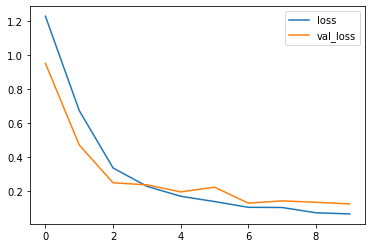

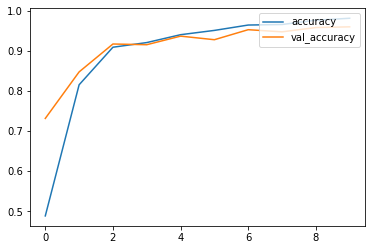

In [ ]:
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

# 6. Preparing for submission

In [ ]:
sub_csv ='/content/drive/MyDrive/ofa-ai-mastery-computer-vision/Sample_submission.csv'
path_test = '/content/drive/MyDrive/ofa-ai-mastery-computer-vision/test/test'

In [ ]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [ ]:
# each image will be treated individually and saved in a list which is then merged with the id of it's correspondence

from tensorflow.keras.preprocessing.image import load_img


# making a list for our predictions
labels = []


for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    label_id = label[0].tolist()

    labels.append(label_id.index(max(label_id)))


1/1 [==============================] - 0s 48ms/step


In [ ]:
# we will replace the previous empty columns with the new predictions

df_sub['Label'] = labels
df_sub.head(10)

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
5,6,1
6,7,3
7,8,0
8,9,3
9,10,2


In [ ]:
# saving file
df_sub.to_csv('submission_file.csv',index=False)